In [1]:
import os
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("assets/data_predicted.csv", index_col='N')

for index, row in data.iterrows():
    if pd.isna(row['Recording']):
        continue
    
    # TODO
    break
    path = "assets/measurements/24/ecg.dat"
    with open(path, 'rb') as f:
        values = np.frombuffer(f.read(), dtype=np.int16)
        T = 30 / len(values)  # all recording have a duration of 30 seconds
    plt.plot(values)
    plt.show()
    
    time = np.arange(0, len(values[:1000])) *T
    plt.plot(time, values[3000:4000])
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.show()

data.to_csv("assets/data_predicted_analyzed.csv", quoting=csv.QUOTE_ALL)

In [5]:
data

,Condition,Subject,Recording,HR,HR_predicted
N,,,,,
1,Neutral,Adam,15:50:04,100.0,69.0
2,Neutral,Adam,15:53:33,101.0,67.0
3,Neutral,NaN,NaN,NaN,NaN
4,Neutral,NaN,NaN,NaN,NaN
5,Neutral,NaN,NaN,NaN,NaN
6,Illumination variation,Adam,15:55:30,129.0,79.0
7,Illumination variation,Adam,15:58:54,128.0,64.0
8,Illumination variation,NaN,NaN,NaN,NaN
9,Illumination variation,NaN,NaN,NaN,NaN


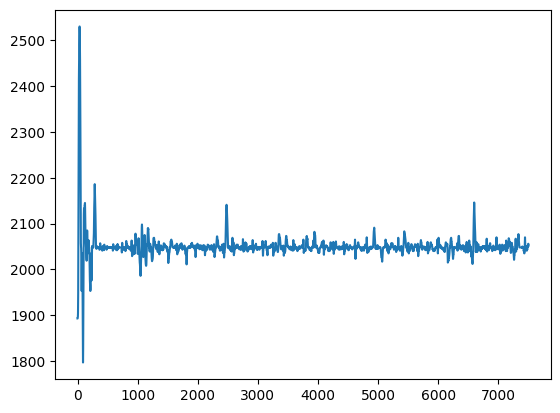

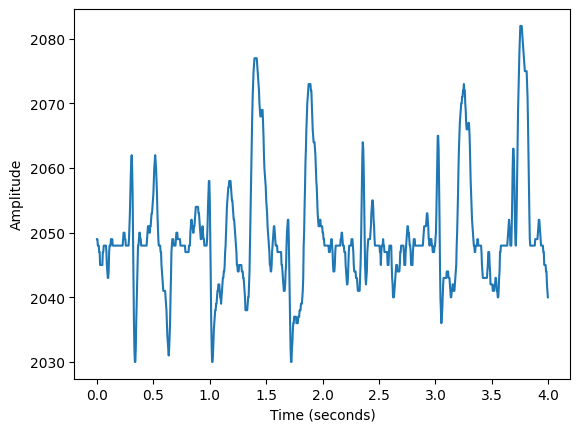

In [8]:
path = "assets/ecg/15:53:33.dat"
with open(path, 'rb') as f:
    values = np.frombuffer(f.read(), dtype=np.int16)
    T = 30 / len(values)  # all recording have a duration of 30 seconds
plt.plot(values)
plt.show()

time = np.arange(0, len(values[:1000])) *T
plt.plot(time, values[3000:4000])
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()